In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import matplotlib.gridspec as gridspec
from magpie_data import NeLMap2

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS


In [3]:
s0429_16_532=NeLMap2('s0429_16 532nm neL.txt', scale=174, multiply_by=1/1.6, rot_angle=-90+22.5)
s=s0429_16_532

<IPython.core.display.Javascript object>


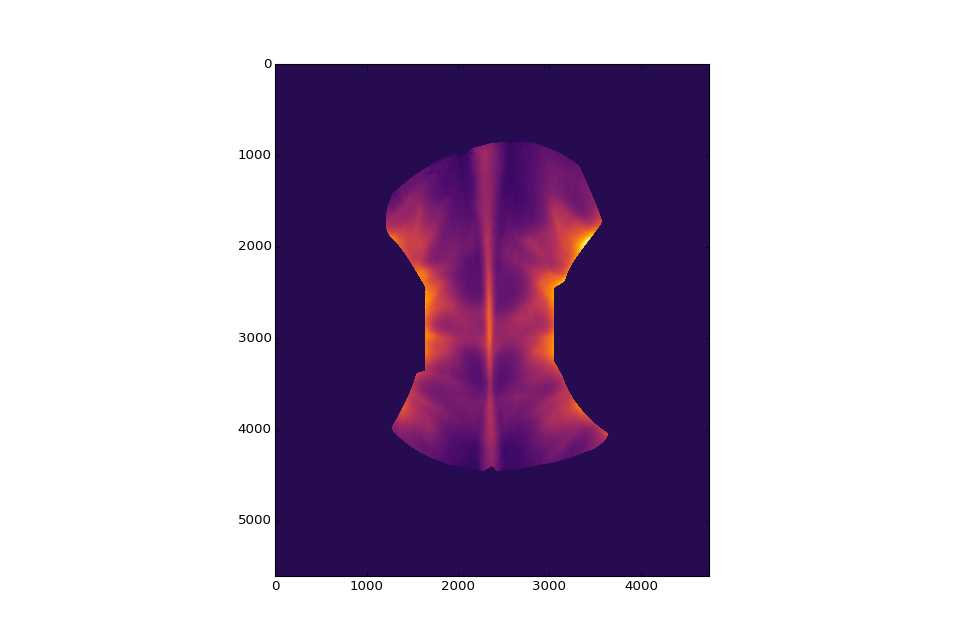

In [6]:
s.plot_data_px()

In [7]:
s.set_origin(origin=(2880,2348), extent=[-12,12,-9,9])

<IPython.core.display.Javascript object>


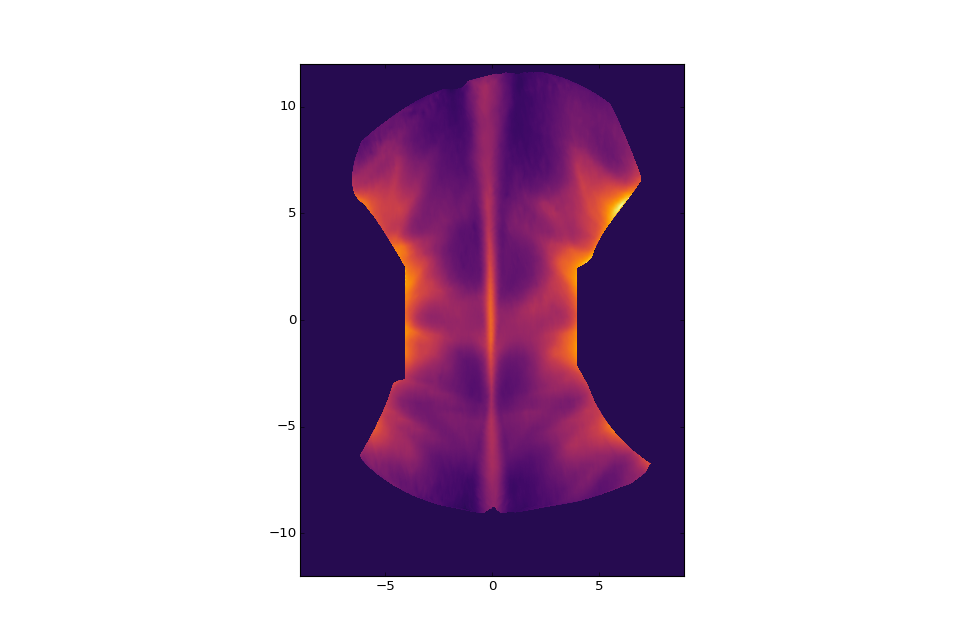

In [8]:
s.plot_data_mm()

In [18]:
s.create_lineout(start=(-1,0),end=(12,0), lineout_width=50)

(0, 522) (2262, 522)


<IPython.core.display.Javascript object>


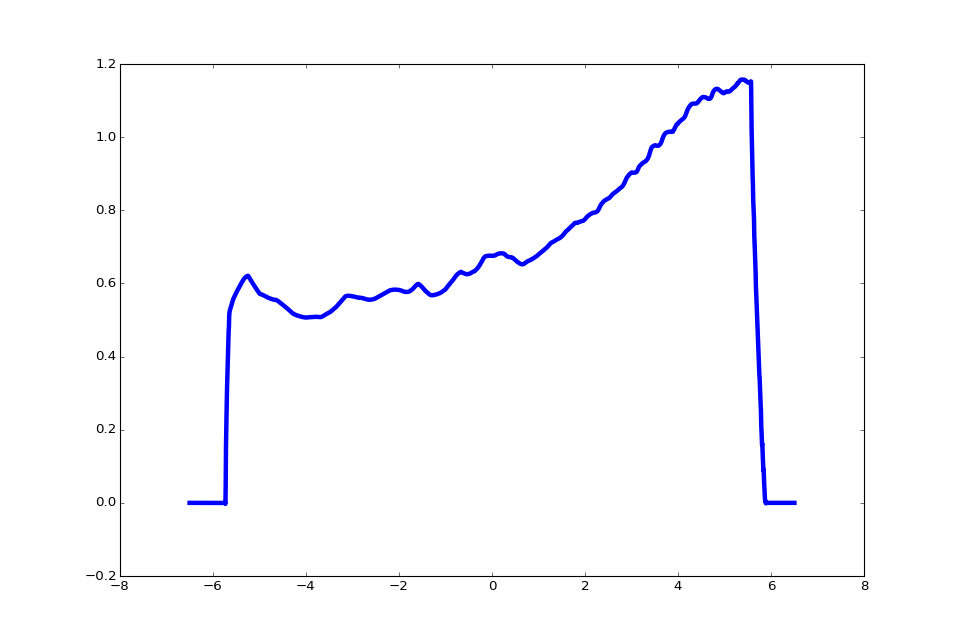

In [20]:
s.plot_lineout(multiply_by=1e-18)

In [4]:
f=[1,8,14]
xx=[1004,1761,2406]
yy=[1054,1350,1604]
        
xm, xc=np.polyfit(f,xx, 1)
ym, yc=np.polyfit(f, yy, 1)
scale=1 #useful if pin positions taken at different scale to shot
y=lambda f: scale*int(f*ym+yc)
x=lambda f: scale*int(f*xm+xc)

In [7]:
x0=4752/2
x0p=s.data.shape[1]/2
y0=3168/2
y0p=s.data.shape[0]/2
th=(90-22.5)/180*np.pi#s.rot_angle

xxr=[]
yyr=[]

for x,y in zip(xx,yy):
    xp=(x-x0)
    yp=(y-y0)
    xr=np.cos(th)*xp-np.sin(th)*yp
    yr=np.sin(th)*xp+np.cos(th)*yp
    xxr.append(xr+x0p)
    yyr.append(yr+y0p)
    
xm, xc=np.polyfit(f,xxr, 1)
ym, yc=np.polyfit(f, yyr, 1)
scale=1 #useful if pin positions taken at different scale to shot
y=lambda f: scale*int(f*ym+yc)
x=lambda f: scale*int(f*xm+xc)

In [21]:
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter

In [16]:
iff=plt.imread('s0429_16 532nm end on interferometry (1).JPG')
ifr=rotate(iff, -90+22.5)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


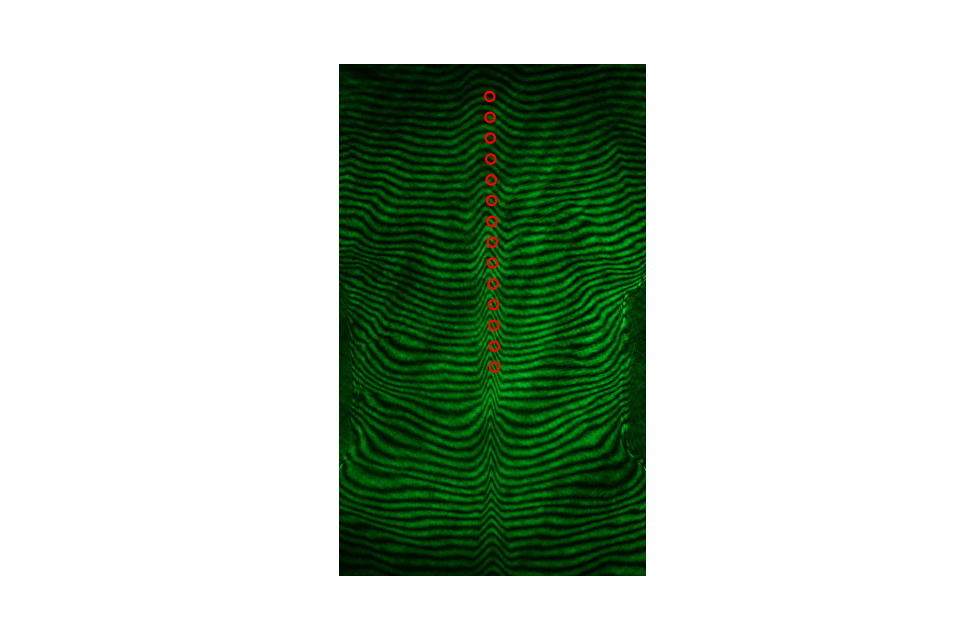

(1500.0, 3200.0, 4000.0, 1150.0)

In [72]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(ifr)

for i in range(1,15):
    color='red'
    ax.add_artist(plt.Circle((x(i),y(i)),26,color=color,fill=False, lw=2))
    
ax.set_ylim([4000, 1150])
ax.set_xlim([1500,3200])
plt.axis('off')

In [73]:
fig.savefig('s0429_16 532nm with fibre locations.png', bbox_inches='tight', dpi=300)

In [44]:
import csv
fn="s0429_16 f14.dat"
shift=[]
Background=[]
Response=[]
Shot=[]
Fit=[]

with open(fn, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    next(reader)
    for row in reader:
        shift.append(float(row[0]))
        Background.append(float(row[1]))
        Response.append(float(row[2]))
        Shot.append(float(row[3]))
        Fit.append(float(row[4]))


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


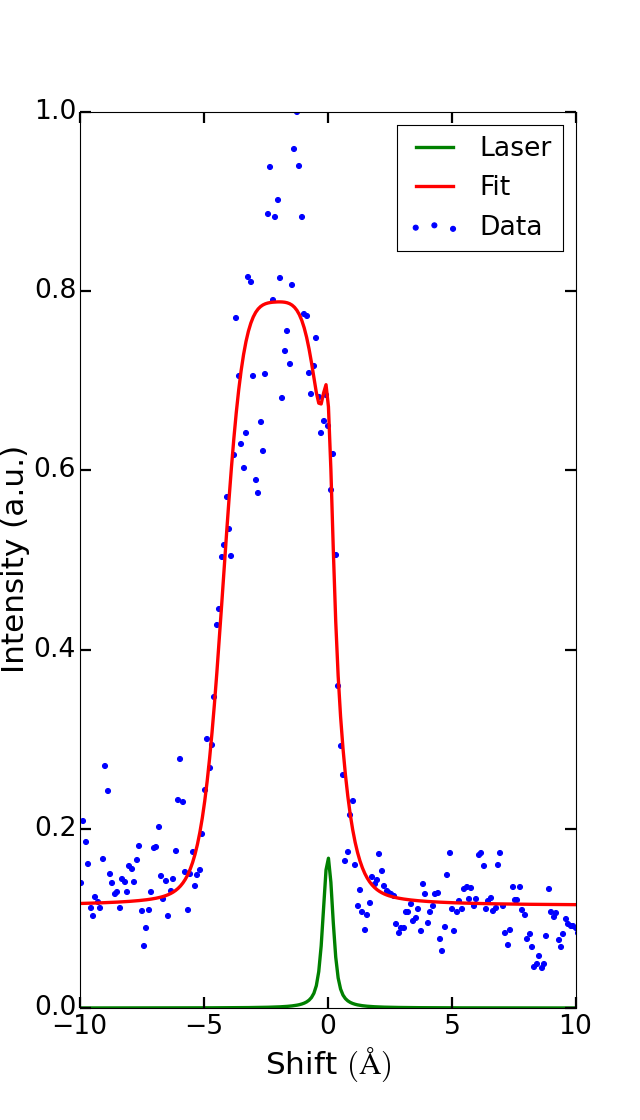

In [69]:
fig, ax=plt.subplots(figsize=(8,14))
ax.plot(shift, np.array(Response)*0.2, lw=3, color='green', label='Laser')
ax.scatter(shift, Shot, color='blue', marker='o', label='Data')
ax.plot(shift, Fit, lw=3, color='red', label='Fit')
ax.set_xlim([-10,10])
ax.set_ylim([0,1])
ax.tick_params(labelsize=24, pad=5, length=10, width=2)
ax.legend(fontsize=24)

ax.set_xlabel(r'Shift $(\AA)$',fontsize=28)
ax.set_ylabel('Intensity (a.u.)',fontsize=28)

In [71]:
fig.savefig('s0429_16 f14 narrow.pdf', dpi=300)

In [84]:
import csv
fn="s0429_16 thomson measurements.dat"
f=[]
vy=[]
S_T_calc=
with open(fn, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        f.append(float(row[0]))
        vy.append(float(row[5]))

<IPython.core.display.Javascript object>


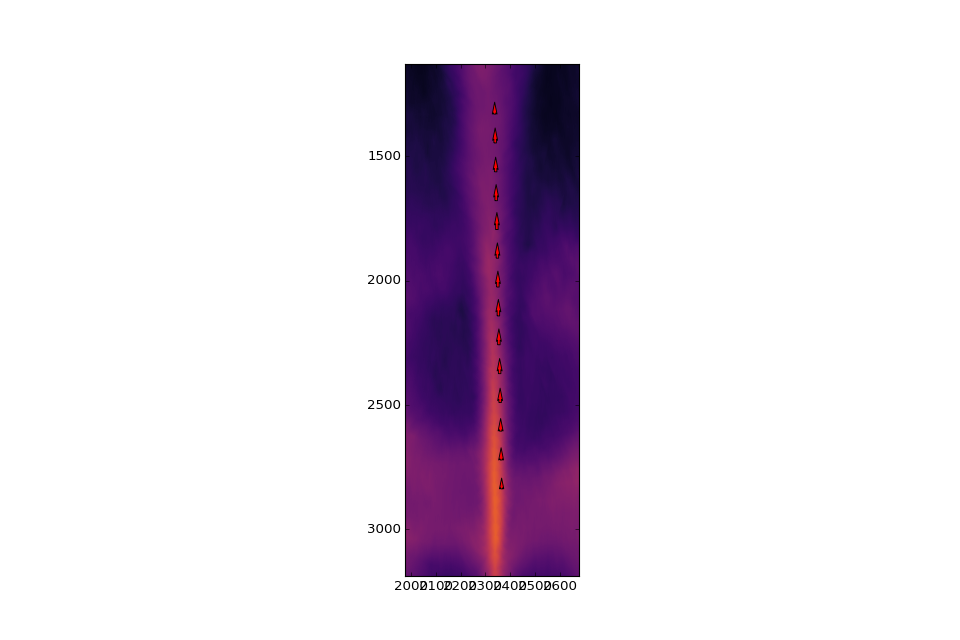

In [90]:
yy=[y(i) for i in f]
xx=[x(i) for i in f]

fig,ax=plt.subplots(figsize=(12,8))
s.plot_data_px(ax=ax, clim=[0,2], multiply_by=1e-18)
#plt.axis('equal')
ax.quiver(xx,yy,np.zeros_like(vy),-np.array(vy),scale=2000, units='xy', color='red', width=10, headwidth=2, edgecolor='black', linewidth=0.8)


In [35]:
def average_over_square(array, centre, size):
    square=array[centre[0]-size:centre[0]+size, centre[1]-size:centre[1]+size]
    return np.mean(square)

In [42]:
n_e=[]
for i in range(1,15):
    n_e.append(average_over_square(s.data, centre=[y(i), x(i)], size=15))

In [46]:
import csv
filename='s0429_16 n_e'

data=zip(range(1,15), n_e)
    
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['Fibre', 'n_e'])
    for f in data:
        cwriter.writerow(f)

# Thomson Intensity

In [78]:
fn="s0429_16 S_T_exp.dat"
S_T_exp=[]
with open(fn, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        S_T_exp.append(float(row[1]))
        
fn="s0429_16 thomson measurements.dat"
S_T_calc=[]
n_e=[]
with open(fn, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        n_e.append(float(row[1]))
        S_T_calc.append(float(row[7]))

In [82]:
S_T_calc=np.array(S_T_calc)*np.array(n_e)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


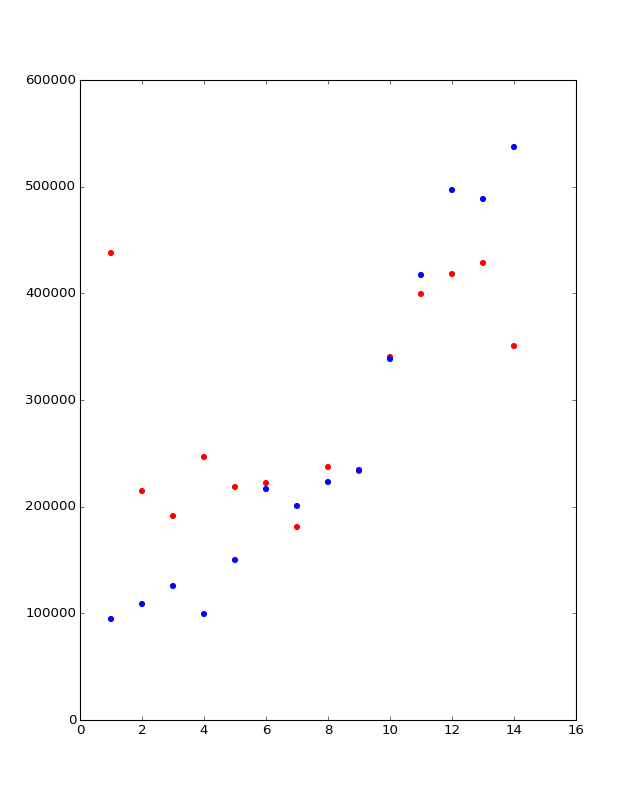

In [93]:
fig, ax =plt.subplots(figsize=(8,10))
ax.scatter(range(1,15), S_T_exp, color='red')
ax.scatter(range(1,15), S_T_calc/1e12, color='blue')

In [94]:
filename='s0429_16 thomson intensities'

data=zip(range(1,15), S_T_exp, S_T_calc)
    
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['Fibre', 'S_T_experimental', 'S_T_calculated'])
    for f in data:
        cwriter.writerow(f)